так, что нам надо. во-первых, конечно надо смотреть сколько успешных тестов. во-вторых всякие обычные штуки типа количества вершин, как состояний, а также количество вершин, которые просто были открыты. потом нужно видимо смотреть во-первых разные штуки для разных алгосов (A*, дейкстра(?), SIPP). Для роботов понимать, получилось ли построить, и если нет видимо длину путей челов. Также

In [121]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [122]:
import pandas as pd

sipp_data = pd.read_csv("sippSingle.csv")
dijkstra_data = pd.read_csv("dijkstraSingle.csv")

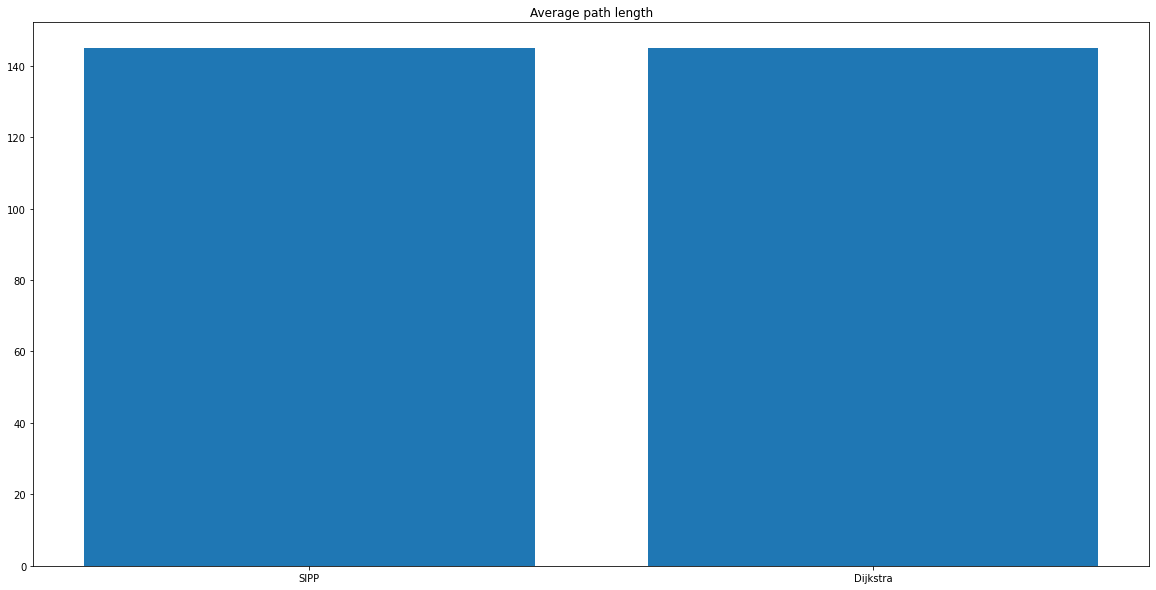

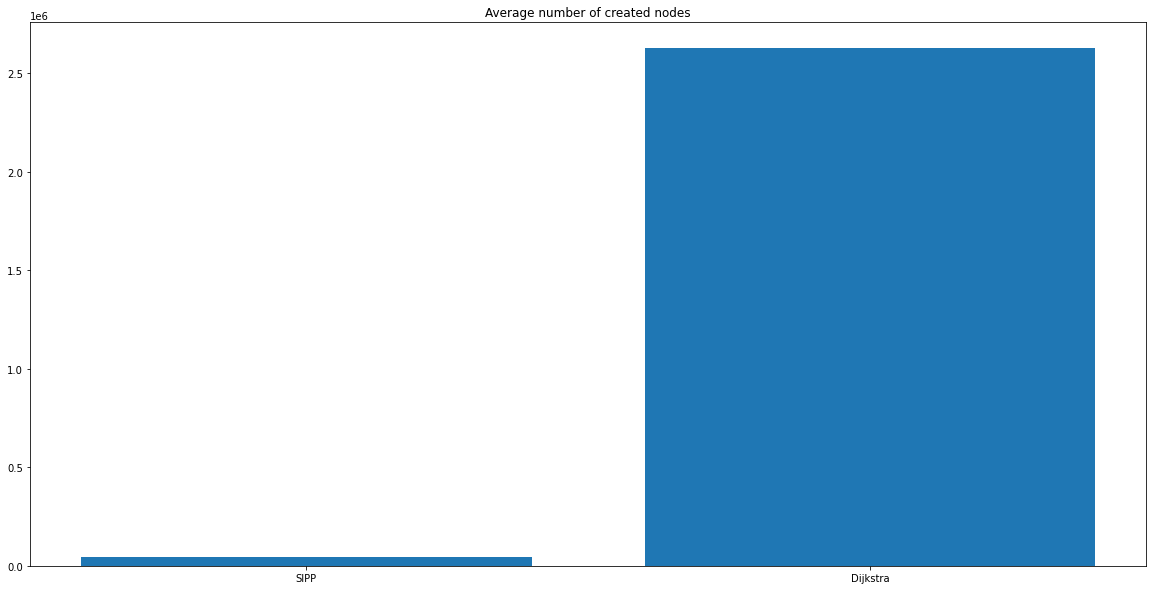

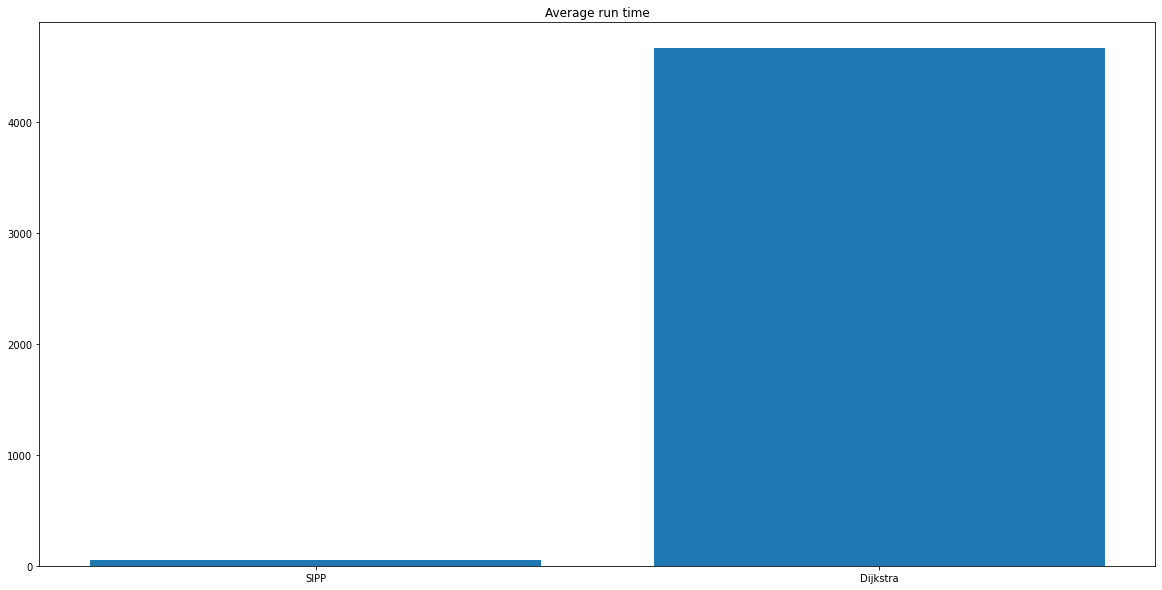

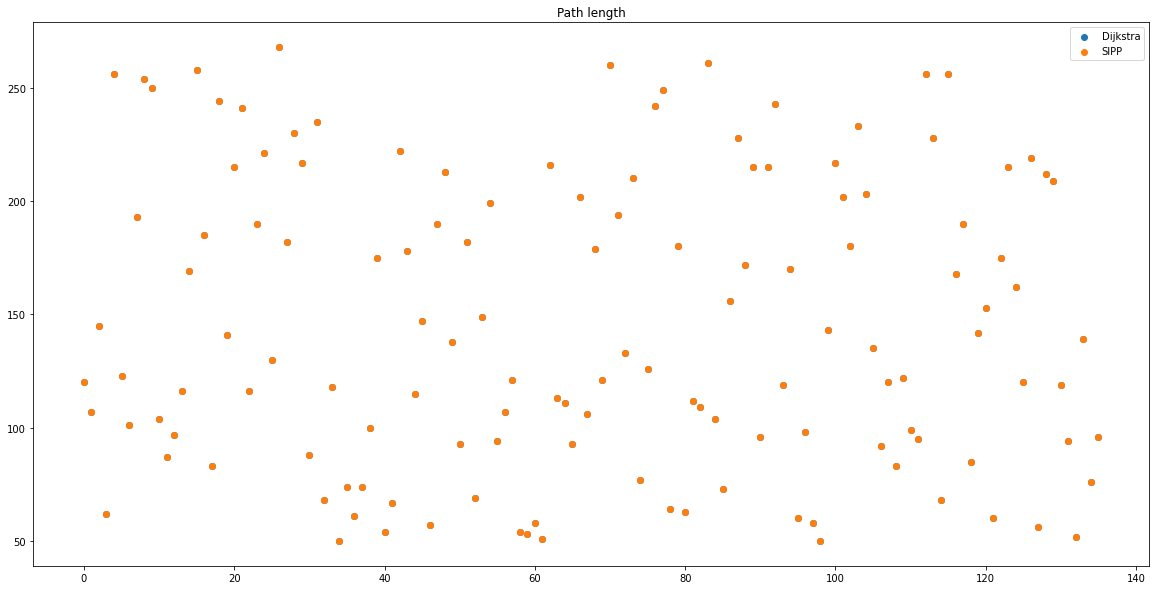

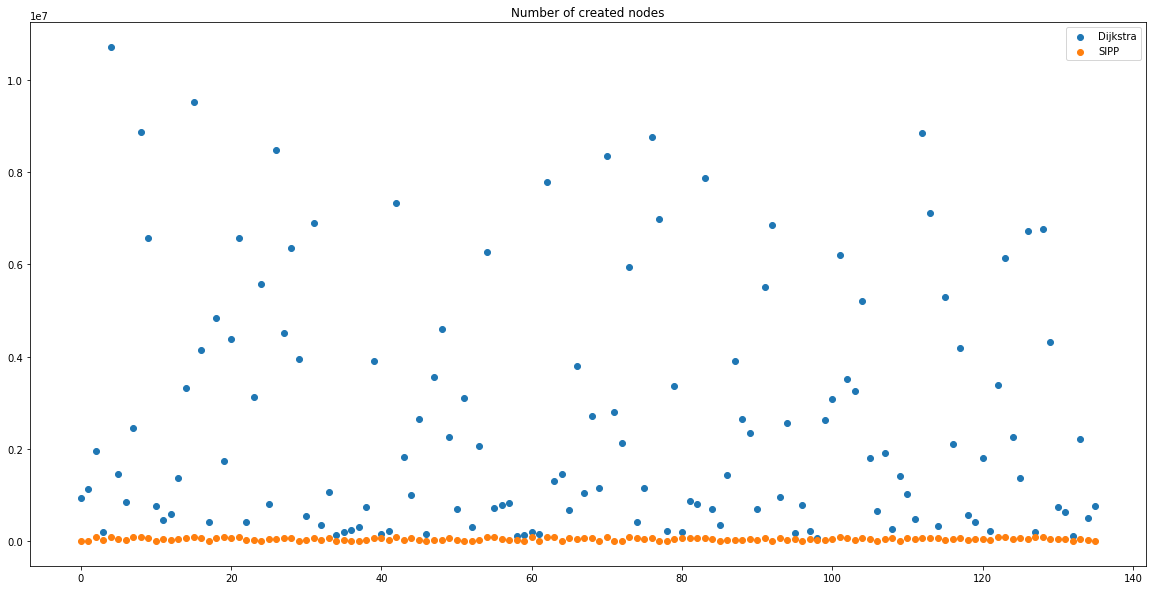

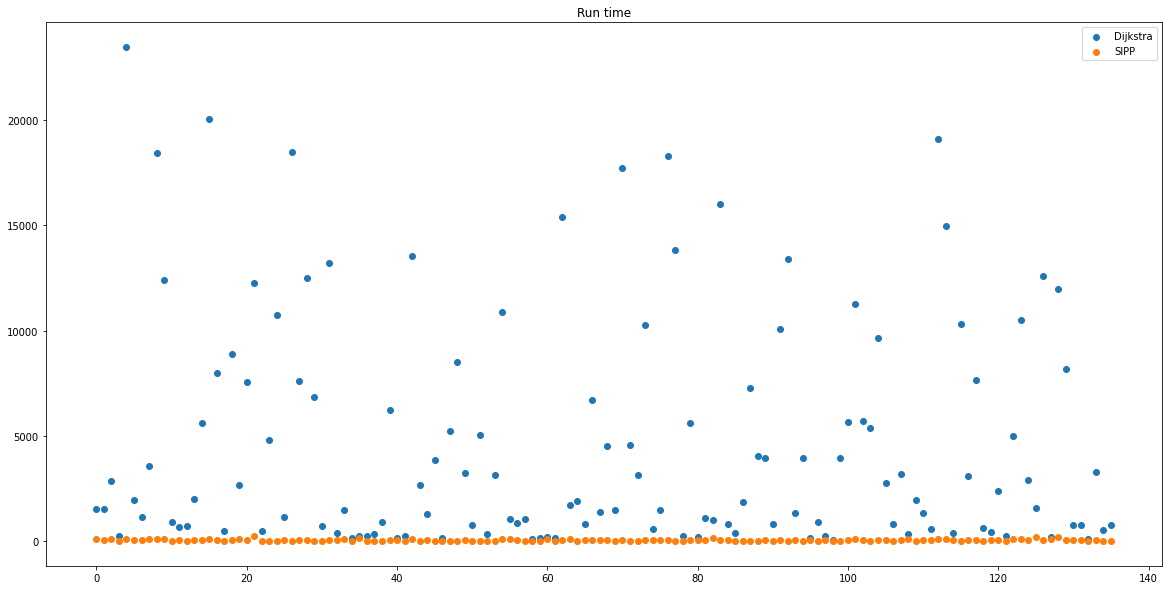

In [123]:
avg_path_len = [sipp_data["path_length"].mean(), dijkstra_data["path_length"].mean()]
avg_nodes_created = [sipp_data["open_cnt"].mean() + sipp_data["closed_cnt"].mean(), 
                     dijkstra_data["open_cnt"].mean() + dijkstra_data["closed_cnt"].mean()]
avg_time = [sipp_data["time_ms"].mean(), dijkstra_data["time_ms"].mean()]

tick_label = ["SIPP", "Dijkstra"]

#просто сравнить все штуки
plt.title("Average path length")
plt.bar([1, 2], avg_path_len, tick_label = tick_label)
plt.show()

plt.title("Average number of created nodes")
plt.bar([1, 2], avg_nodes_created, tick_label = tick_label)
plt.show()

plt.title("Average run time")
plt.bar([1, 2], avg_time, tick_label = tick_label)
plt.show()

path_lens_dij = dijkstra_data["path_length"]
path_lens_sipp = sipp_data["path_length"]
nodes_created_dij = dijkstra_data["open_cnt"] + dijkstra_data["closed_cnt"]
nodes_created_sipp = sipp_data["open_cnt"] + sipp_data["closed_cnt"]
time_dij = dijkstra_data["time_ms"]
time_sipp = sipp_data["time_ms"]

#более подробно
plt.title("Path length")
plt.scatter([i for i in range(len(path_lens_dij))], path_lens_dij, label="Dijkstra")
plt.scatter([i for i in range(len(path_lens_sipp))], path_lens_sipp, label="SIPP")
plt.legend()
plt.show()

plt.title("Number of created nodes")
plt.scatter([i for i in range(len(nodes_created_dij))], nodes_created_dij, label="Dijkstra")
plt.scatter([i for i in range(len(nodes_created_sipp))], nodes_created_sipp, label="SIPP")
plt.legend()
plt.show()

plt.title("Run time")
plt.scatter([i for i in range(len(time_dij))], time_dij, label="Dijkstra")
plt.scatter([i for i in range(len(time_sipp))], time_sipp, label="SIPP")
plt.legend()
plt.show()

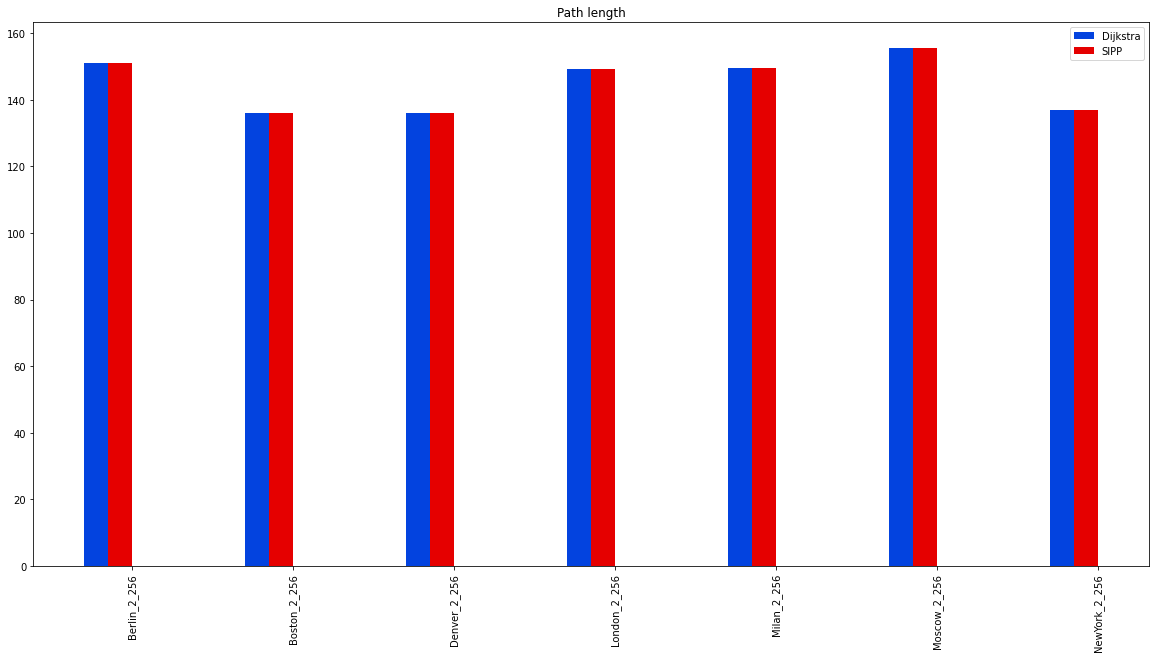

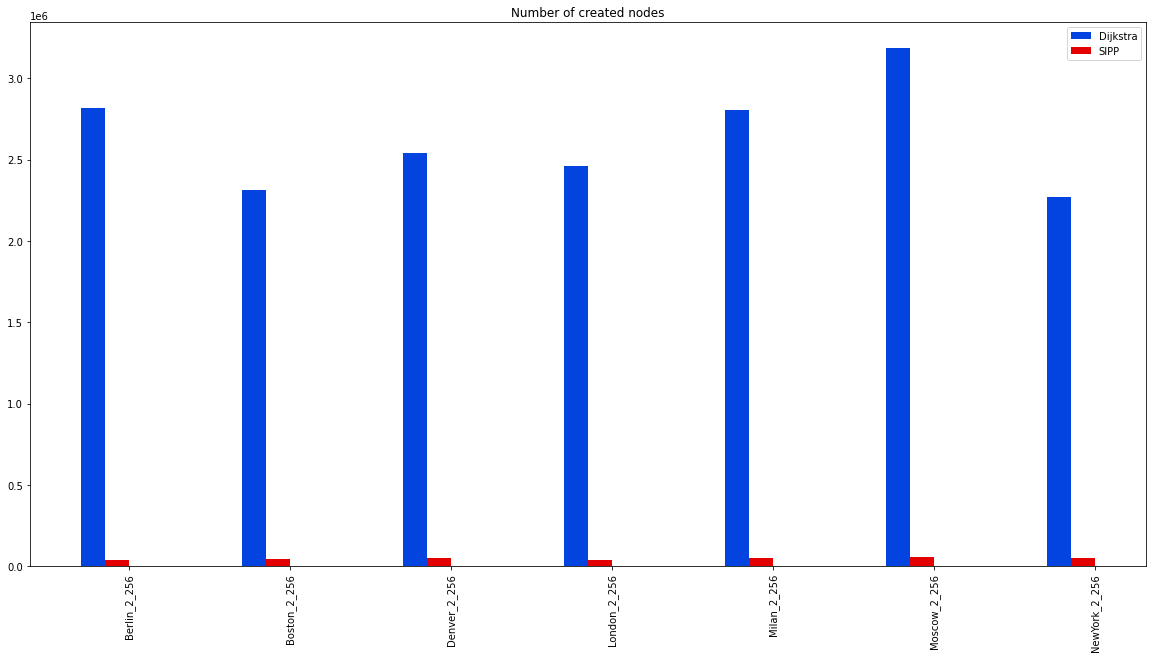

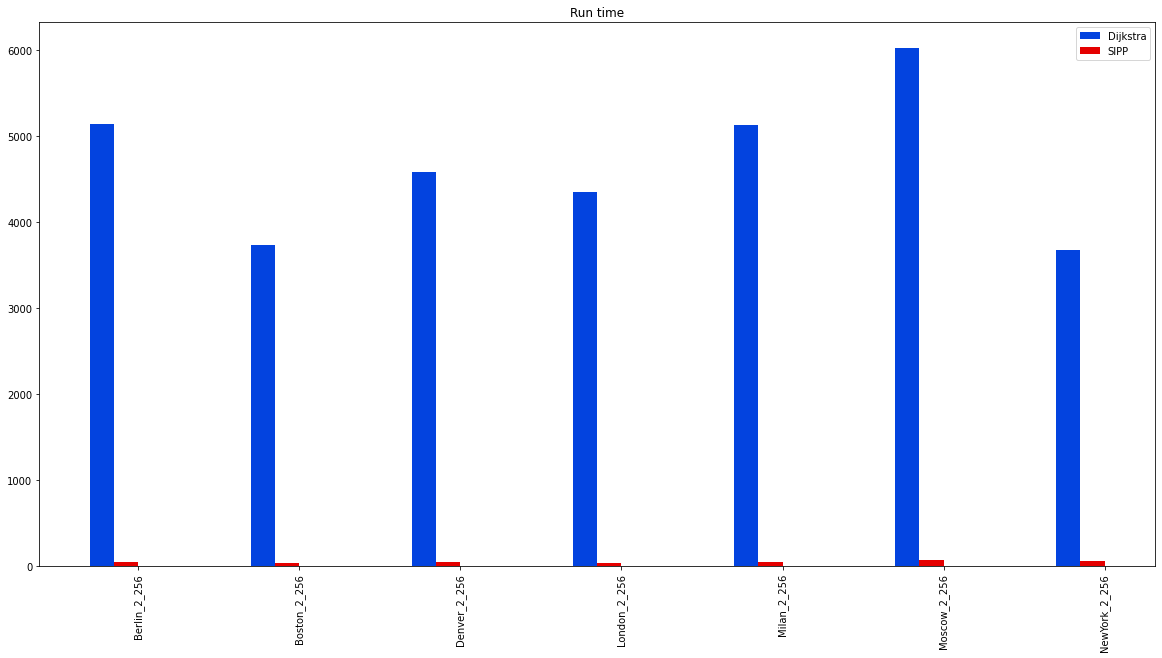

In [124]:
import numpy as np
width = 0.15

fig, ax = plt.subplots()

averages_sipp = sipp_data.groupby(["test_name"]).mean()
averages_dijkstra = dijkstra_data.groupby(["test_name"]).mean()
maps = sipp_data["test_name"].unique()
maps.sort()
x = np.arange(len(maps))

ax.bar(x - 3*width/2, averages_dijkstra["path_length"], width, label='Dijkstra', color='#0343df')
ax.bar(x - width/2, averages_sipp["path_length"], width, label='SIPP', color='#e50000')

ax.set_title('Path length')
ax.set_xticks(x)
ax.set_xticklabels(maps, rotation='vertical')
ax.legend()

plt.show()

fig, ax = plt.subplots()

ax.bar(x - 3*width/2, averages_dijkstra["open_cnt"] + averages_dijkstra["closed_cnt"], 
       width, label='Dijkstra', color='#0343df')
ax.bar(x - width/2, averages_sipp["open_cnt"] + averages_sipp["closed_cnt"], 
       width, label='SIPP', color='#e50000')

ax.set_title('Number of created nodes')
ax.set_xticks(x)
ax.set_xticklabels(maps, rotation='vertical')
ax.legend()

plt.show()

fig, ax = plt.subplots()

ax.bar(x - 3*width/2, averages_dijkstra["time_ms"], width, label='Dijkstra', color='#0343df')
ax.bar(x - width/2, averages_sipp["time_ms"], width, label='SIPP', color='#e50000')

ax.set_title('Run time')
ax.set_xticks(x)
ax.set_xticklabels(maps, rotation='vertical')
ax.legend()

plt.show()

In [125]:
ma_quickest = pd.read_csv("maQuickest_first.csv")
ma_max_sum = pd.read_csv("maMax_sum_squares.csv")
ma_slowest = pd.read_csv("maSlowest_first.csv")
ma_min_sum = pd.read_csv("maMin_sum_squares.csv")
ma_start_cliques = pd.read_csv("maStart_cliques_first.csv")

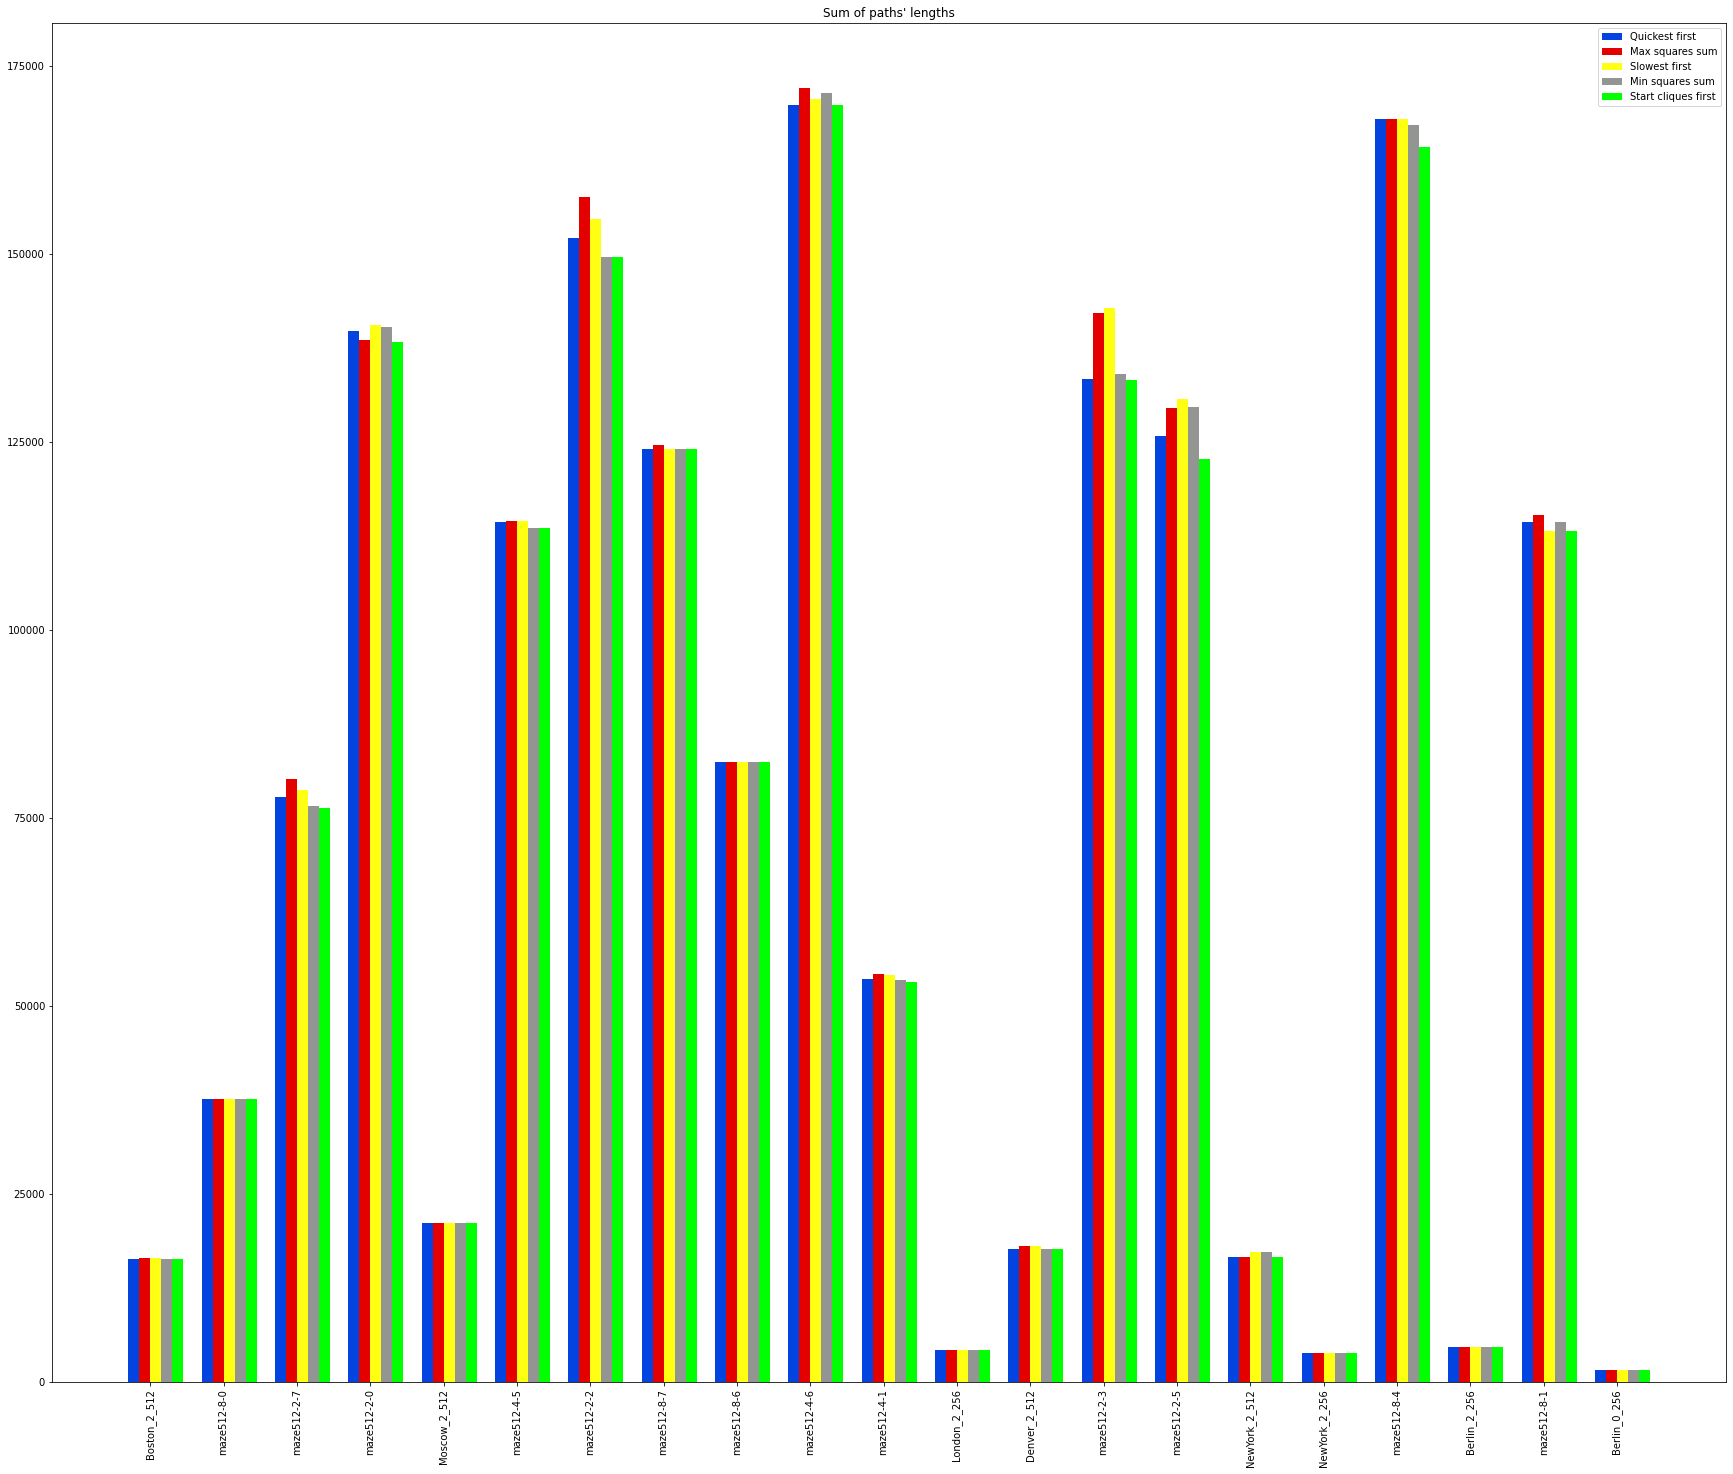

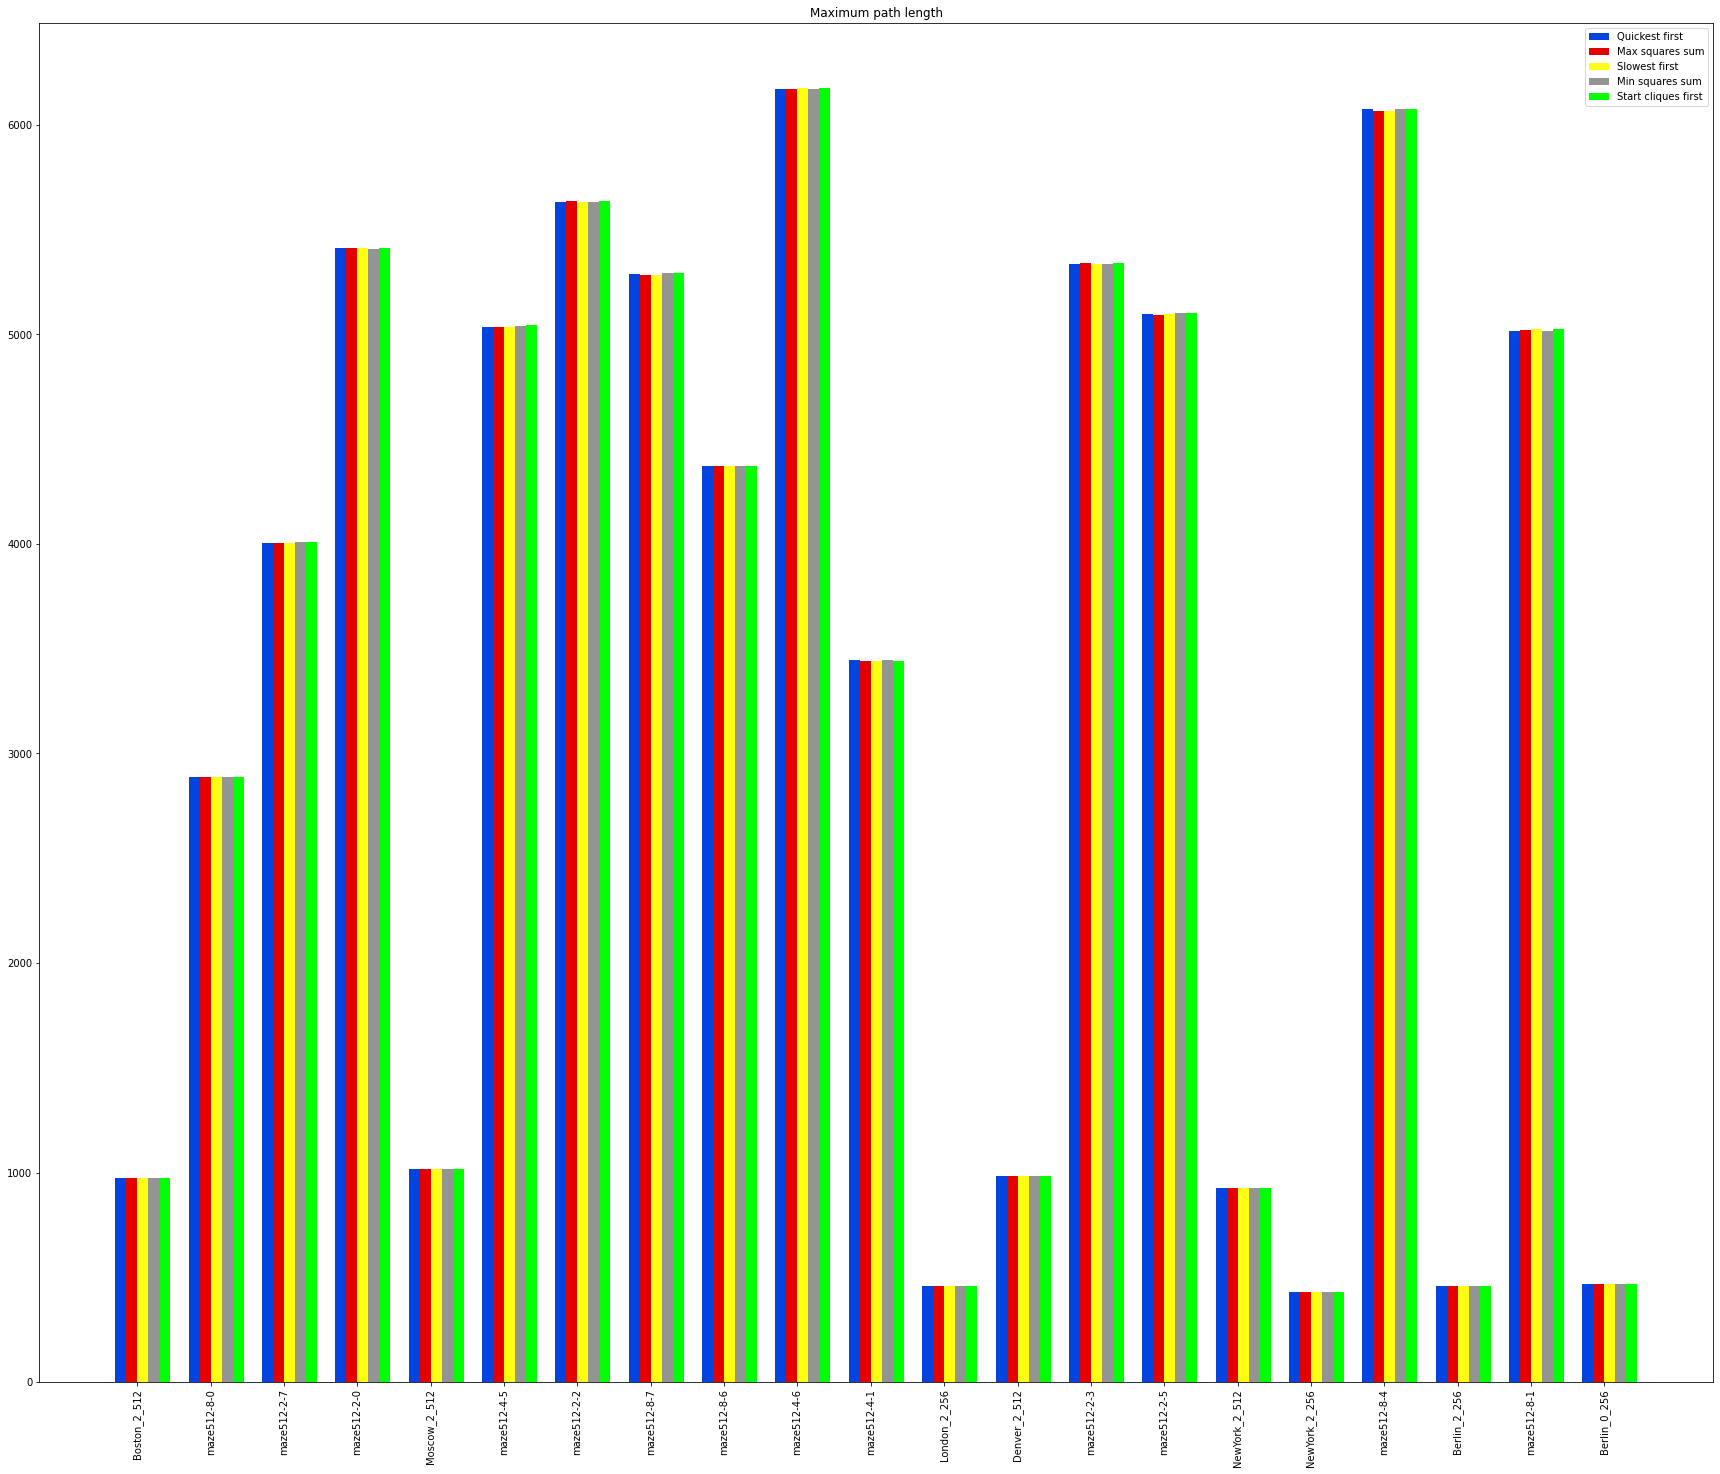

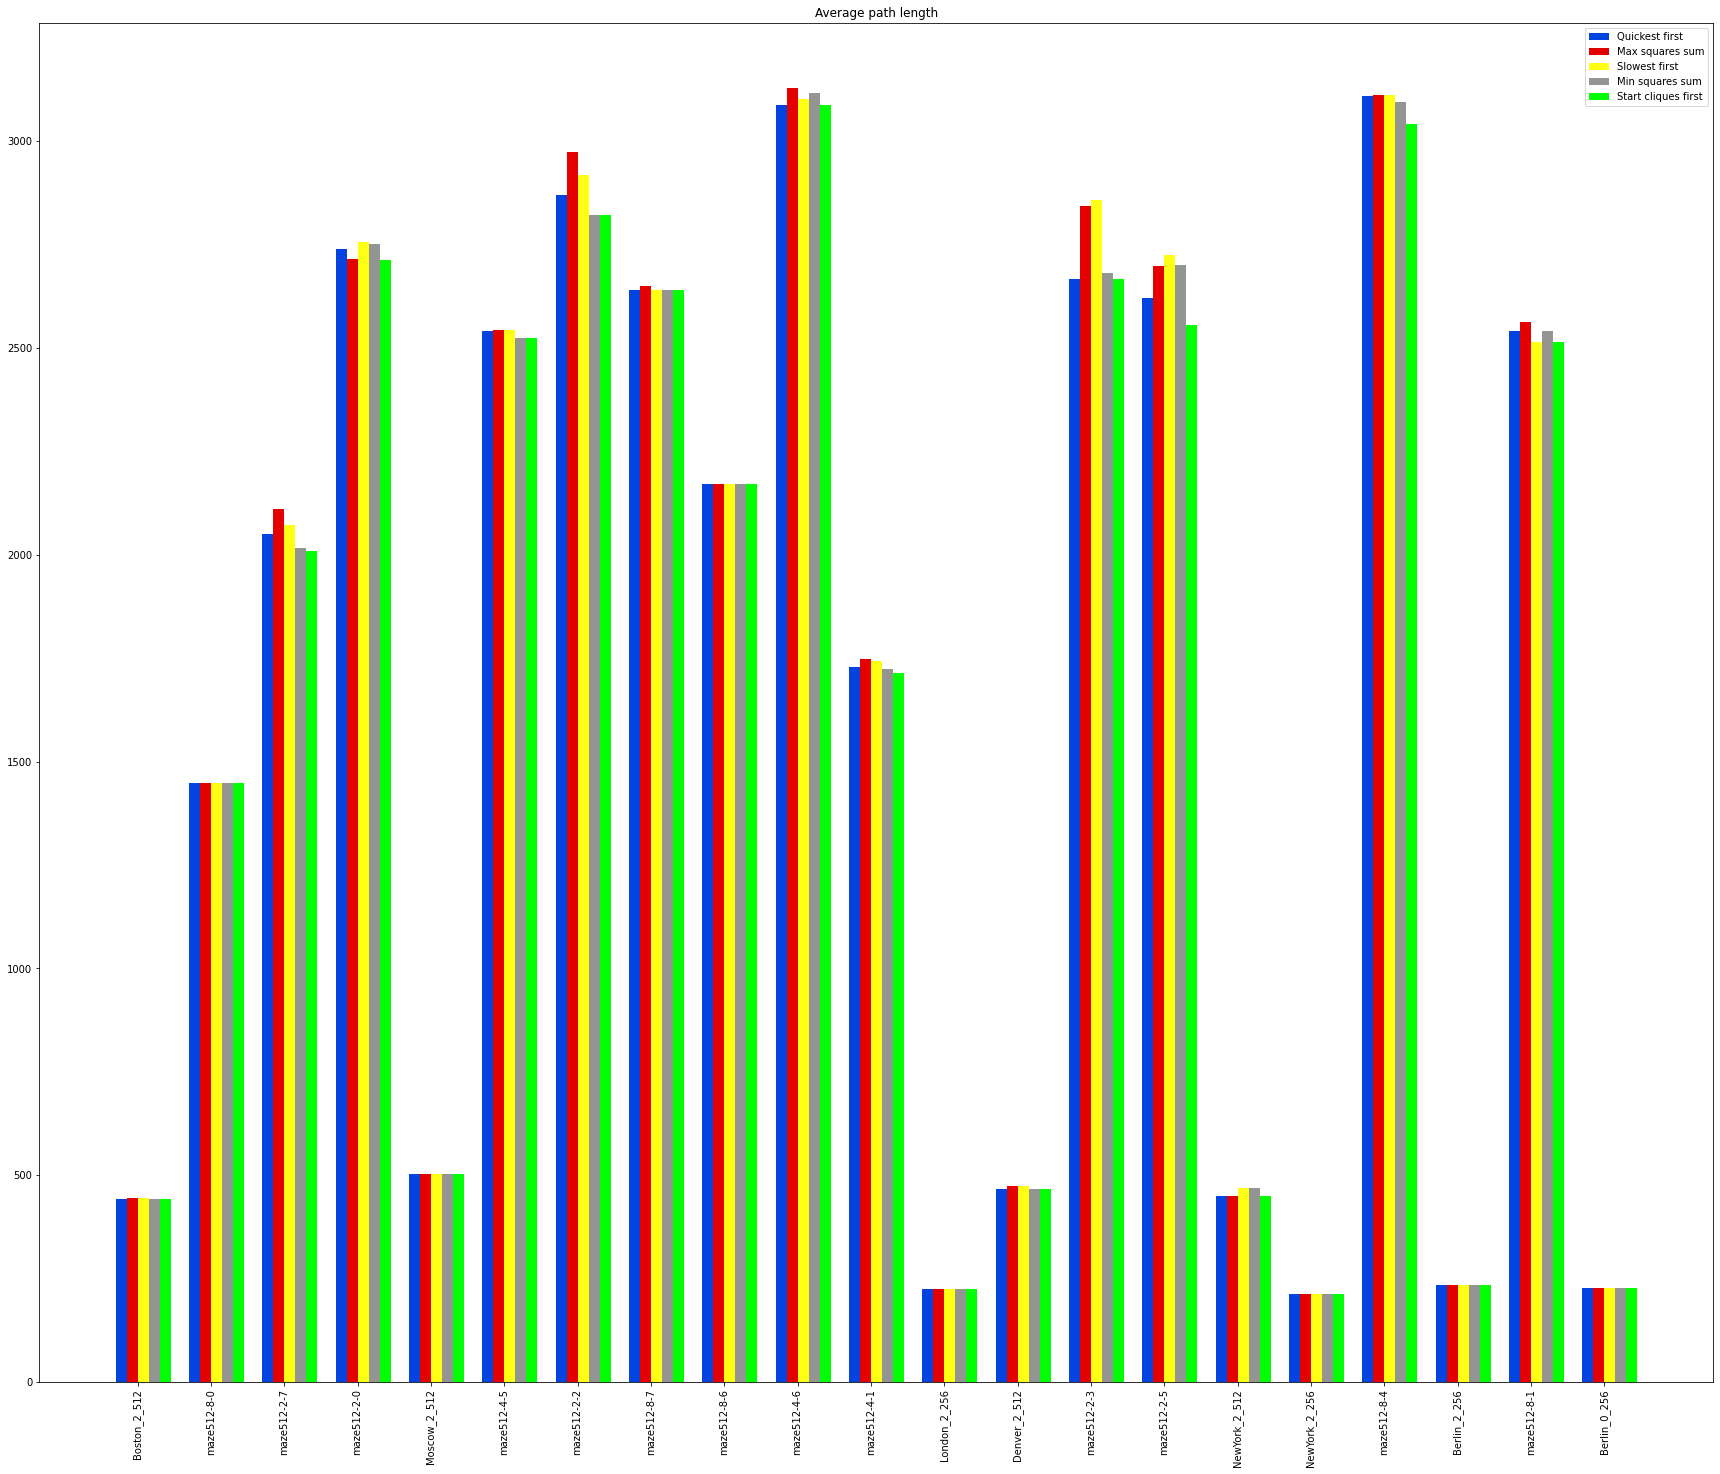

In [132]:
width = 0.15

fig, ax = plt.subplots()

fig.set_size_inches(30, 25)

maps = ma_quickest["map_name"]
x = np.arange(len(maps))

ax.bar(x - 3*width/2, ma_quickest["sum_length"], width, label='Quickest first', color='#0343df')
ax.bar(x - width/2, ma_max_sum["sum_length"], width, label='Max squares sum', color='#e50000')
ax.bar(x + width/2, ma_slowest["sum_length"], width, label='Slowest first', color='#ffff14')
ax.bar(x + 3*width/2, ma_min_sum["sum_length"], width, label='Min squares sum', color='#929591')
ax.bar(x + 5*width/2, ma_start_cliques["sum_length"], width, label='Start cliques first', color='#00FF00')

ax.set_title('Sum of paths\' lengths')
ax.set_xticks(x)
ax.set_xticklabels(maps, rotation='vertical')
ax.legend()

plt.show()

fig, ax = plt.subplots()

fig.set_size_inches(30, 25)

ax.bar(x - 3*width/2, ma_quickest["max_length"], width, label='Quickest first', color='#0343df')
ax.bar(x - width/2, ma_max_sum["max_length"], width, label='Max squares sum', color='#e50000')
ax.bar(x + width/2, ma_slowest["max_length"], width, label='Slowest first', color='#ffff14')
ax.bar(x + 3*width/2, ma_min_sum["max_length"], width, label='Min squares sum', color='#929591')
ax.bar(x + 5*width/2, ma_start_cliques["max_length"], width, label='Start cliques first', color='#00FF00')

ax.set_title('Maximum path length')
ax.set_xticks(x)
ax.set_xticklabels(maps, rotation='vertical')
ax.legend()

plt.show()

fig, ax = plt.subplots()

fig.set_size_inches(30, 25)

ax.bar(x - 3*width/2, ma_quickest["avg_length"], width, label='Quickest first', color='#0343df')
ax.bar(x - width/2, ma_max_sum["avg_length"], width, label='Max squares sum', color='#e50000')
ax.bar(x + width/2, ma_slowest["avg_length"], width, label='Slowest first', color='#ffff14')
ax.bar(x + 3*width/2, ma_min_sum["avg_length"], width, label='Min squares sum', color='#929591')
ax.bar(x + 5*width/2, ma_start_cliques["avg_length"], width, label='Start cliques first', color='#00FF00')

ax.set_title('Average path length')
ax.set_xticks(x)
ax.set_xticklabels(maps, rotation='vertical')
ax.legend()

plt.show()